<a href="https://colab.research.google.com/github/subhashpolisetti/Dimensionality_Reduction/blob/main/Dimensionality_Reduction_Using_Databricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA on Iris Dataset for Dimensionality Reduction and Visualization

In this notebook, we apply **Principal Component Analysis (PCA)** to the **Iris dataset** to reduce its dimensionality from four features to two principal components. We then visualize the reduced data and compare it to the original dataset to explore how well PCA captures the structure of the data.

## Steps:

### 1. **Load and Prepare the Dataset**
We load the **Iris dataset** from sklearn, which contains 150 samples of iris flowers with four features (sepal length, sepal width, petal length, and petal width) for three different species.

### 2. **Standardization**
The dataset is standardized using `StandardScaler` to ensure that each feature has zero mean and unit variance. This is important for PCA as it is sensitive to the scale of the data.

### 3. **Apply PCA for Dimensionality Reduction**
PCA is applied to reduce the data to two dimensions. We use the first two principal components, which capture most of the variance in the data.

### 4. **Visualize the Results**
We visualize the following:
- The **original data**: A scatter plot of Sepal Length vs Sepal Width to show the feature distribution.
- The **PCA-transformed data**: A scatter plot of the first two principal components to demonstrate how PCA reduces the dimensions while preserving the structure of the data.
  
Both visualizations are color-coded based on the target species of the iris flowers.

### 5. **Explained Variance**
We print the **explained variance ratio** of the two principal components to understand how much of the original data's variance is retained by these components. The higher the variance explained, the better the components represent the data.

## Conclusion:
- **PCA** helps in reducing the dimensionality of the Iris dataset while retaining most of the important information.
- The visualizations show how PCA separates the different iris species in a 2D space.
- The explained variance ratio indicates that the first principal component captures a significant portion of the data’s variance, helping us to understand the most important aspects of the data.

This notebook demonstrates how PCA can be used for exploratory data analysis and visualization, simplifying the complexity of high-dimensional data.


In [3]:
from google.colab import files

# This will prompt you to upload a file from your local machine
uploaded = files.upload()


Saving Dimensionality_Reduction-IrisDataset.dbc to Dimensionality_Reduction-IrisDataset.dbc


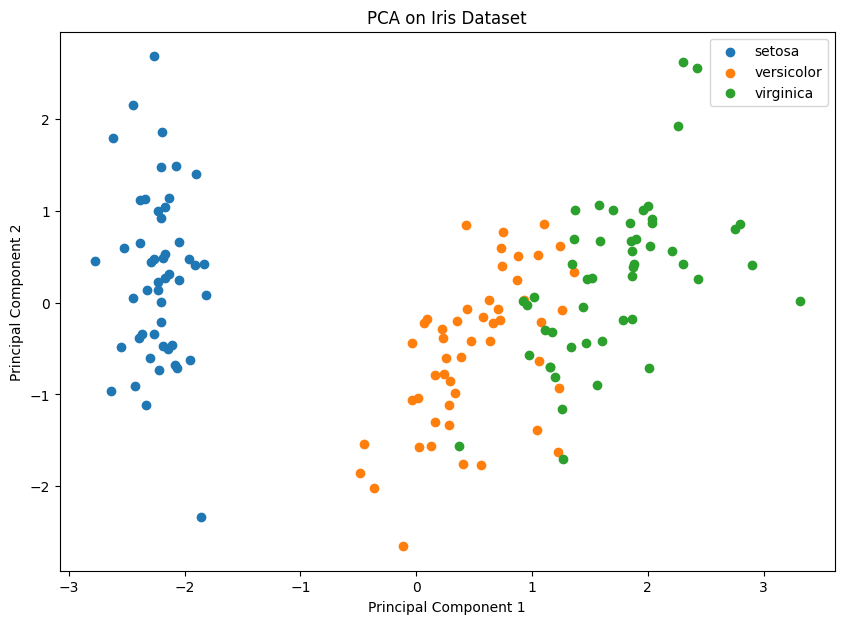

Explained Variance Ratio by Components: [0.72962445 0.22850762]


In [12]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler  # For standardizing the data
from sklearn.decomposition import PCA  # For applying Principal Component Analysis (PCA)
import pandas as pd  # For creating and manipulating DataFrames
import matplotlib.pyplot as plt  # For plotting the visualizations

# Step 1: Load the dataset from the uploaded file (assuming it's in CSV format)
# You can change the file path if needed or if it's in a different format
file_path = '/mnt/data/Dimensionality_Reduction-IrisDataset.dbc'

# Load the DBC file
# You can load it using pandas if it's in a compatible format such as CSV or Excel
# If the file is not in a compatible format, further parsing might be needed.
try:
    iris_df = pd.read_csv(file_path)  # Change this based on the actual format if not CSV
except Exception as e:
    print(f"Error loading file: {e}")

# Check the first few rows of the data to understand its structure
print(iris_df.head())

# Assuming the target column is the last one and the other columns are features
# Extracting feature columns and target column (assuming the last column is the target)
features = iris_df.iloc[:, :-1].values  # Assuming last column is the target
target = iris_df.iloc[:, -1].values  # Assuming the target is in the last column
target_names = iris_df.columns[-1]  # Change this based on your dataset if needed

# Step 2: Standardize the data
# Standardize the feature data (mean = 0, std = 1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Apply PCA for Dimensionality Reduction
# PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Step 4: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = target  # Add the target labels for color-coding in the plot

# Step 5: Visualization of the Reduced Dimensions
# Visualizing the first two principal components in a scatter plot
plt.figure(figsize=(10, 7))  # Set the size of the plot
# Loop through each target class (species) and create a scatter plot
for i, target_name in enumerate(set(target)):  # Set to ensure unique target values
    plt.scatter(
        pca_df[pca_df['Target'] == i]['Principal Component 1'],  # X-axis: Principal Component 1
        pca_df[pca_df['Target'] == i]['Principal Component 2'],  # Y-axis: Principal Component 2
        label=target_name  # Label each species for legend
    )

# Set plot labels and title
plt.title('PCA on Iris Dataset')  # Title for the plot
plt.xlabel('Principal Component 1')  # Label for the X-axis
plt.ylabel('Principal Component 2')  # Label for the Y-axis
plt.legend()  # Show the legend to differentiate between species
plt.show()  # Display the plot

# Step 6: Explained Variance
# Print the explained variance ratio of the principal components
# This tells us how much variance each principal component captures from the original data
print("Explained Variance Ratio by Components:", pca.explained_variance_ratio_)


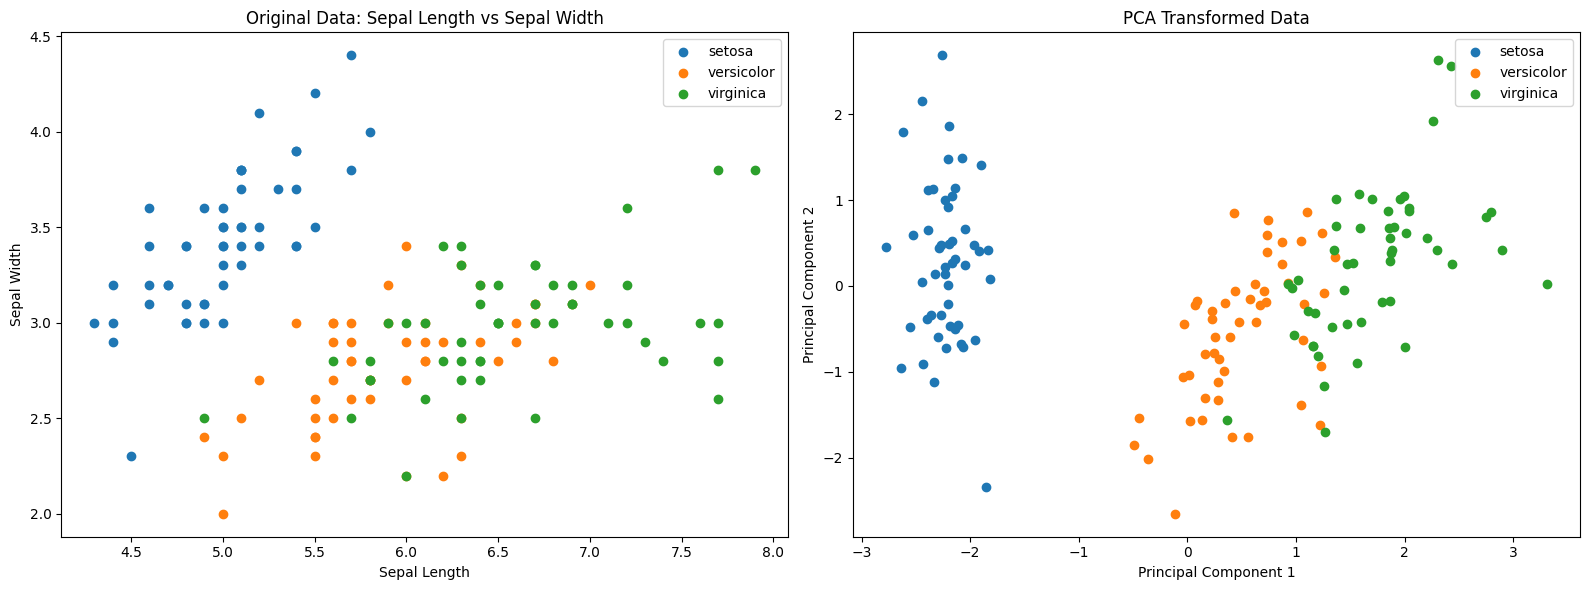

Explained Variance Ratio by Components: [0.72962445 0.22850762]


In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For creating the visualizations
from sklearn.datasets import load_iris  # For loading the Iris dataset
from sklearn.preprocessing import StandardScaler  # For standardizing the data
from sklearn.decomposition import PCA  # For applying Principal Component Analysis (PCA)
import pandas as pd  # For creating and manipulating DataFrames

# Step 1: Load the Iris dataset
# The Iris dataset contains 150 samples of iris flowers with 4 features (sepal length, sepal width, petal length, petal width)
iris = load_iris()
data = iris.data  # Features of the iris flowers (150 samples, 4 features)
target = iris.target  # Target labels (species of the iris flower)
target_names = iris.target_names  # Names of the iris species (setosa, versicolor, virginica)

# Step 2: Create a DataFrame for the original data
# Create a DataFrame for the original data with the feature names as columns
original_df = pd.DataFrame(data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
original_df['Target'] = target  # Add the target (species) to the DataFrame for later visualization

# Step 3: Standardize the data
# Standardizing the data ensures that each feature has zero mean and unit variance
# This is important because PCA is sensitive to the scale of the data.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # Apply standardization to the feature data

# Step 4: Apply PCA for Dimensionality Reduction
# PCA reduces the dimensionality of the data by projecting it onto the directions of maximum variance.
# We choose to reduce the data to 2 dimensions for easier visualization.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)  # Perform PCA and reduce the data to 2 components

# Step 5: Create a DataFrame with the PCA results
# Create a new DataFrame containing the two principal components and the target labels
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = target  # Add the target labels (species) to the PCA DataFrame for later use in the plot

# Step 6: Visualize the Original Data (Sepal Length vs Sepal Width)
# Create a figure with two subplots: one for the original data and one for the PCA-transformed data
plt.figure(figsize=(16, 6))  # Set the size of the figure for better visibility

# Plot Original Data (Sepal Length vs Sepal Width)
# The first subplot visualizes the original data using Sepal Length and Sepal Width
plt.subplot(1, 2, 1)
for i, target_name in enumerate(target_names):
    # Scatter plot for each species, with different colors for each class
    plt.scatter(
        original_df[original_df['Target'] == i]['Sepal Length'],  # X-axis: Sepal Length
        original_df[original_df['Target'] == i]['Sepal Width'],  # Y-axis: Sepal Width
        label=target_name  # Label for each species
    )
plt.title('Original Data: Sepal Length vs Sepal Width')  # Title of the plot
plt.xlabel('Sepal Length')  # Label for the X-axis
plt.ylabel('Sepal Width')  # Label for the Y-axis
plt.legend()  # Add a legend to show which color corresponds to which species

# Step 7: Plot PCA Transformed Data
# The second subplot visualizes the data after PCA transformation in the 2D space of the first two principal components
plt.subplot(1, 2, 2)
for i, target_name in enumerate(target_names):
    # Scatter plot for each species, with different colors for each class
    plt.scatter(
        pca_df[pca_df['Target'] == i]['Principal Component 1'],  # X-axis: Principal Component 1
        pca_df[pca_df['Target'] == i]['Principal Component 2'],  # Y-axis: Principal Component 2
        label=target_name  # Label for each species
    )
plt.title('PCA Transformed Data')  # Title of the plot
plt.xlabel('Principal Component 1')  # Label for the X-axis
plt.ylabel('Principal Component 2')  # Label for the Y-axis
plt.legend()  # Add a legend to show which color corresponds to which species

# Step 8: Display the plots
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()  # Show the plot with both original and PCA-transformed data

# Step 9: Explained Variance
# Print the explained variance ratio to understand how much variance each principal component captures from the original data
print("Explained Variance Ratio by Components:", pca.explained_variance_ratio_)

